In [1]:
import html5lib
from bs4 import BeautifulSoup
from selenium import webdriver
from datetime import date, timedelta
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

num_top=15
days_range=1*365

range_end=date.today()
range_start=range_end-timedelta(days=days_range)
url=f"https://github.com/openstack/nova/graphs/contributors?from={range_start}&to={range_end}&type=c"
print("Link being scrapped to view contributions:", url)

chromeOptions = Options()
chromeOptions.headless = True
driver = webdriver.Chrome(options=chromeOptions)
driver.get(url)

try:
    element = WebDriverWait(driver, 30).until(
        EC.visibility_of_element_located((By.CLASS_NAME, "contrib-person")))
    soup = BeautifulSoup(driver.page_source, 'html5lib')

    with open("openstack_nova_contributions.html", "wb") as file:
        file.write(soup.prettify("utf-8"))
    print("Done")
    
finally:
    driver.quit()

Link being scrapped to view contributions: https://github.com/openstack/nova/graphs/contributors?from=2020-02-09&to=2021-02-08&type=c
Done
Timeout! Took longer than 30 seconds to load github contributions.


In [2]:
names=[]
commits=[]
for i in range (1, num_top):
    all_contrib=soup.find_all("li",class_="contrib-person")
    name=all_contrib[i].find("a",class_="text-normal").getText()
    commit=int(all_contrib[i].find("a",class_="link-gray text-normal").getText().strip(" commits"))
    names.append(name)
    commits.append(commit)

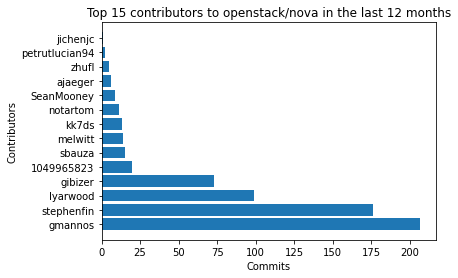

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
x_pos = [i for i, _ in enumerate(names)]
plt.barh(x_pos, commits)
plt.ylabel("Contributors")
plt.xlabel("Commits")
plt.title("Top 15 contributors to openstack/nova in the last 12 months")
plt.yticks(x_pos, names)
plt.savefig('top_contributors.jpg', dpi=300,bbox_inches='tight')
plt.show()
